Ha: Work done so far: change all data types, drop some corrupted rows with at start_time and end_time
Delete all rows with null value.
Calculating idle time (station-level and trip-level)

Import weather data


In [1]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import math
import random

## Step 1: Import Data 

In [2]:
# load csv file and set the index column by 0
df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)
df.head(20)

c:\Users\riven\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\riven\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50.0,37.780526,-122.390288,453.0,37.777934,-122.396973,12424.0
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285.0,37.783521,-122.431158,74.0,37.776435,-122.426244,1718.0
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10.0,37.795393,-122.40477,399.0,37.802636,-122.436289,608.0
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106.0,37.763242,-122.430675,72.0,37.772406,-122.43565,551642.0
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80.0,37.775235,-122.397437,50.0,37.780526,-122.390288,1103.0
5,2019-04-17 19:39:05,2019-04-17 19:49:26,100.0,37.7671,-122.410662,74.0,37.776435,-122.426244,1473.0
6,2019-02-26 08:11:01,2019-02-26 08:22:58,67.0,37.776639,-122.395526,8.0,37.799953,-122.398525,4984.0
7,2019-02-02 09:23:15,2019-02-02 09:34:20,44.0,37.781074,-122.411738,55.0,37.777053,-122.429558,2666.0
8,2019-05-07 12:08:01,2019-05-07 12:12:00,9.0,37.798572,-122.400869,6.0,37.80477,-122.403234,1961.0
9,2019-09-04 21:58:19,2019-09-04 22:09:07,86.0,37.769305,-122.426826,39.0,37.778999,-122.436861,9717.0


In [3]:
# take a look at the data types and general information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507003 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 191.3+ MB
None
       start_time end_time  start_station_id  start_station_lat  \
count     2507003  2507003         2426269.0       2.507003e+06   
unique    2304544  2303004             867.0       7.712800e+04   
top       Failure  Failure              58.0       3.777662e+01   
freq           10       10           34467.0       3.446700e+04   

        start_station_lon  end_station_id  end_station_lat  end_station_lon  \
count        2.507003e+06       2424101.0     2.507003e+06     2.507003e+06   
unique

We can see that the data types are not specified which makes it hard to work with. After inspecting the dataset, there are rows containing "Failure" so we want to remove all of these. 

In [4]:
# create a new data frame that containts all failure rows from dft
rent_failure = df["start_time"].str.contains("Failure")
data_failure = df[rent_failure]
data_failure

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
381556,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
485428,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
621119,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
713198,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1150787,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1558857,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1676023,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1697405,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1999499,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
2249494,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [5]:
# remove all rows that match failure rows
df = df.drop(data_failure.index, axis=0)

## Step 2: Transform Data

Now we have to convert every feature to the correct data types in order to to make calculations and analysis.

In [6]:
df["bike_id"]= pd.to_numeric(df["bike_id"], errors='coerce')
df["bike_id"]= df["bike_id"].astype('Int64')
df["start_station_lat"]= pd.to_numeric(df["start_station_lat"], errors='coerce')
df["start_station_lon"]=pd.to_numeric(df["start_station_lon"], errors='coerce')
df['start_station_lat'] = df['start_station_lat'].round(6)
df['start_station_lon'] = df['start_station_lon'].round(6)
df["end_station_lat"]=pd.to_numeric(df["end_station_lat"], errors='coerce')
df["end_station_lon"]=pd.to_numeric(df["end_station_lon"], errors='coerce')
df["start_station_id"] =pd.to_numeric(df["start_station_id"], errors='coerce')
df["start_station_id"]= df["start_station_id"].astype("Int64")
df["end_station_id"] =pd.to_numeric(df["end_station_id"], errors='coerce')
df["end_station_id"]= df["end_station_id"].astype("Int64")

df["start_time"]= pd.to_datetime(df["start_time"],format ='%Y-%m-%d %H:%M:%S')
df["end_time"]= pd.to_datetime(df["end_time"],format ='%Y-%m-%d %H:%M:%S')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506993 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   Int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     Int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            Int64         
dtypes: Int64(3), datetime64[ns](2), float64(4)
memory usage: 198.4 MB
None


In [7]:
# After transforming the data we check if there are any non-defined values.
df.isna().sum()

start_time               0
end_time                 0
start_station_id     80734
start_station_lat        0
start_station_lon        0
end_station_id       82902
end_station_lat          0
end_station_lon          0
bike_id                  1
dtype: int64

In [8]:
df[df["start_station_id"].isnull() | df["end_station_id"].isnull()]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
17,2019-07-28 13:49:45,2019-07-28 14:17:33,<NA>,37.806791,-122.419491,<NA>,37.798469,-122.401155,928582
33,2019-12-12 17:49:31,2019-12-12 18:08:43,<NA>,37.334925,-121.892451,<NA>,37.336896,-121.876394,211150
35,2019-07-22 16:46:26,2019-07-22 17:17:12,<NA>,37.801673,-122.444816,<NA>,37.807854,-122.418555,183615
54,2019-07-17 08:49:28,2019-07-17 09:07:23,<NA>,37.856264,-122.285781,256,37.875112,-122.260553,392211
64,2019-07-24 11:56:17,2019-07-24 12:05:06,<NA>,37.804854,-122.269595,<NA>,37.798805,-122.260244,250740
...,...,...,...,...,...,...,...,...,...
2506932,2019-12-02 07:31:20,2019-12-02 08:36:24,<NA>,37.332835,-121.892882,<NA>,37.402764,-121.940023,419120
2506941,2019-12-04 04:57:36,2019-12-04 05:03:18,<NA>,37.310447,-121.895164,<NA>,37.311285,-121.884870,676328
2506972,2019-11-28 22:30:18,2019-11-28 22:35:15,<NA>,37.342053,-121.910386,<NA>,37.342588,-121.911388,211150
2506975,2019-07-22 13:18:37,2019-07-22 13:32:23,<NA>,37.803232,-122.400816,<NA>,37.791067,-122.400340,904759


## Step 3: Handle missing and incorrect values

Firstly, we noticed that there are entries which have invalid start or end time (not in 2019). Since the amount of it is less than 5%, we can remove these.

In [9]:
# drop some rows with start_time in 2013
df.drop(df[(df['start_time'].dt.year < 2018) | (df['start_time'].dt.year > 2020)].index, inplace=True)
df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50,37.780526,-122.390288,453,37.777934,-122.396973,12424
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285,37.783521,-122.431158,74,37.776435,-122.426244,1718
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10,37.795393,-122.404770,399,37.802636,-122.436289,608
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106,37.763242,-122.430675,72,37.772406,-122.435650,551642
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80,37.775235,-122.397437,50,37.780526,-122.390288,1103
...,...,...,...,...,...,...,...,...,...
2506998,2019-04-12 19:11:48,2019-04-12 19:17:34,109,37.763316,-122.421904,381,37.758238,-122.426094,6118
2506999,2019-07-16 19:02:32,2019-07-16 19:06:54,58,37.776619,-122.417385,5,37.783899,-122.408445,1479
2507000,2019-05-29 16:03:26,2019-05-29 16:09:25,23,37.791464,-122.391034,15,37.795392,-122.394203,1742
2507001,2019-08-19 08:32:17,2019-08-19 08:41:26,23,37.791464,-122.391034,364,37.772000,-122.389970,10107


Secondly, there are missing values in <b>start_station_id</b> and <b>end_station_id</b> column. We tried different approaches to handle these values:
- Using <b>k-means clustering algorithm</b> to assign an ID to the given longtitudes and latitudes.

- <b>Dropping</b> all rows with missing values.

The cost of performing the first method was higher than the latter and the amount of missing values take up less than 5%, so we decided to opt for the second approach.

In [10]:
df.drop(df[df['start_station_id'].isnull() | df['end_station_id'].isnull()].index, inplace = True)

array([[<AxesSubplot:title={'center':'start_time'}>,
        <AxesSubplot:title={'center':'end_time'}>,
        <AxesSubplot:title={'center':'start_station_id'}>],
       [<AxesSubplot:title={'center':'start_station_lat'}>,
        <AxesSubplot:title={'center':'start_station_lon'}>,
        <AxesSubplot:title={'center':'end_station_id'}>],
       [<AxesSubplot:title={'center':'end_station_lat'}>,
        <AxesSubplot:title={'center':'end_station_lon'}>,
        <AxesSubplot:title={'center':'bike_id'}>]], dtype=object)

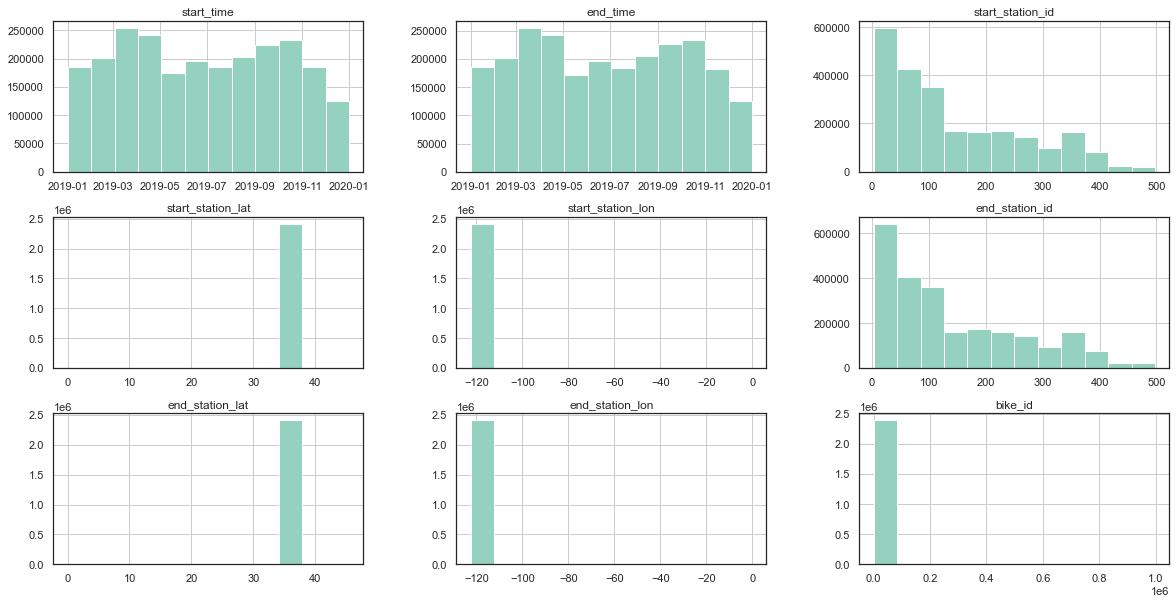

In [61]:
df.hist(bins = 12, figsize = (20, 10))

Something can be interpreted from the above graph:
the stations with the station_id under 150 are more occupied than the rest, maybe they are located within city center?




Now let's try to calculate idle time
2 approach: idle time group by bike_id, and idle time group by station_id

the first one is easier to implement 

Let's go with the first approach first


In [ ]:
start_stations =df.loc[:,['start_time', 'start_station_id', 'bike_id']]
start_stations["rented"] = 1
start_stations.rename(columns = {"start_time": "timestamp", 'start_station_id': "station_id"}, inplace=True)
start_stations


Now we want to try the second approach.

In [ ]:
end_stations =df.loc[:,['end_time', 'end_station_id', 'bike_id']]
end_stations["rented"] = 0
end_stations.rename(columns={"end_time": "timestamp", 'end_station_id': "station_id"}, inplace=True)
end_stations

In [ ]:
df_merged = pd.concat([start_stations, end_stations], axis = 0)
df_merged = df_merged.sort_values(by = ["station_id", "timestamp"])
df_merged['idle_time'] = pd.Timedelta(0)
df_merged

We define a function that calculates idle time with the help of a nested loop inside the dataframe

In [ ]:


def idle_cal(df):
    
    df = df.groupby('station_id')
    results = []  # List to store the modified groups
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
    
        group_data['prev_row'] = group_data.groupby("station_id")['timestamp'].shift(1)
        for i, row in group_data.iterrows():
            if i != 0:
                if row['rented'] == 1:
                    idle_time = pd.Timedelta(0)
                    #print('idle at i ', i , ':', idle_time)
                    j = i - 1 
                    while j>=1 and group_data.at[j,'rented'] == 0:
                        idle_time = group_data.at[i,'timestamp'] -  group_data.at[j,'timestamp']
                        group_data.at[j,'idle_time'] = idle_time
                        #print('idle at j ', j , ':',  idle_time)
                        j -= 1
                    
        results.append(group_data)

    modified_df = (pd.concat(results, ignore_index=True))
    df = pd.DataFrame(modified_df)
    return df
    
                    
        

              


In [ ]:
df_merged = idle_cal(df_merged)
df_merged.head(100)

In [11]:
df_merged.to_csv('idle_time_calculated')  

NameError: name 'df_merged' is not defined

In [ ]:
notnull =df_merged[df_merged['idle_time']!=pd.Timedelta(0)]
print(notnull)

In [12]:
df_w_idle_time = pd.read_csv("idle_time_calculated")
idle_time_per_trip = df_w_idle_time[df_w_idle_time['rented'] == 0]


In [13]:
df_w_idle_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4814518 entries, 0 to 4814517
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   timestamp   object
 2   station_id  int64 
 3   bike_id     int64 
 4   rented      int64 
 5   idle_time   object
dtypes: int64(4), object(2)
memory usage: 220.4+ MB


In [13]:
df_w_idle_time['timestamp']= pd.to_datetime(df_w_idle_time['timestamp'],format ='%Y-%m-%d %H:%M:%S')

In [14]:
idle_time_per_trip['end_time'] = idle_time_per_trip['timestamp']
idle_time_per_trip['end_time'] = pd.to_datetime(idle_time_per_trip['end_time'], format = '%Y-%m-%d %H:%M:%S')

C:\Users\riven\AppData\Local\Temp/ipykernel_28936/96042065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idle_time_per_trip['end_time'] = idle_time_per_trip['timestamp']
C:\Users\riven\AppData\Local\Temp/ipykernel_28936/96042065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idle_time_per_trip['end_time'] = pd.to_datetime(idle_time_per_trip['end_time'], format = '%Y-%m-%d %H:%M:%S')


In [15]:

df_trip = pd.merge(df, idle_time_per_trip, on = ['end_time', 'bike_id'])
df_trip = df_trip.sort_values(by = 'end_time')


In [16]:
df_trip = df_trip.drop(['Unnamed: 0','timestamp','station_id','rented'], axis=1)



In [18]:

df_w_idle_time['sum_idle_time']= pd.Timedelta(0)
df_w_idle_time['idle_mode_count']= 0
df_w_idle_time['month']= df_w_idle_time['timestamp'].dt.month




In [17]:
def get_weekday(ts):
    return ts.weekday()


In [19]:
df_w_idle_time['day']= df_w_idle_time['timestamp'].dt.day
df_w_idle_time['hour']= df_w_idle_time['timestamp'].dt.hour
df_w_idle_time['day_of_week']= df_w_idle_time["timestamp"].apply(lambda x: get_weekday(x))


In [22]:

weekday ={0,1,2,3,4,5}
df_w_idle_time['isWeekday'] = np.where(df_w_idle_time['day_of_week'].isin(weekday), 1, 0)


In [29]:
df_w_idle_time.drop('day_of_week', axis=1, inplace=True)

In [30]:
df_w_idle_time

,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,sum_idle_time,idle_mode_count,month,day,hour,isWeekday
7,7,2019-01-01 09:15:31,3,2191,0,0 days 01:53:17,0 days,0,1,1,9,1
8,8,2019-01-01 09:21:00,3,5063,0,0 days 01:47:48,0 days,0,1,1,9,1
9,9,2019-01-01 09:30:24,3,5262,0,0 days 01:38:24,0 days,0,1,1,9,1
10,10,2019-01-01 10:37:41,3,5354,0,0 days 00:31:07,0 days,0,1,1,10,1
11,11,2019-01-01 10:43:06,3,4760,0,0 days 00:25:42,0 days,0,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4814513,4814513,2019-12-30 14:29:13,498,10962,0,0 days 00:00:23,0 days,0,12,30,14,1
4814514,4814514,2019-12-30 14:29:36,498,10962,1,0 days 00:00:00,0 days,0,12,30,14,1
4814515,4814515,2019-12-30 14:36:08,498,10962,0,0 days 20:52:52,0 days,0,12,30,14,1
4814516,4814516,2019-12-31 11:29:00,498,10962,1,0 days 00:00:00,0 days,0,12,31,11,1


In [58]:
def sum_idle_cal(df):
    
    df = df.groupby('station_id')
    results = {}  # dict to store the modified groups
    
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
        sum_idle_time= pd.Timedelta(0)
        idle_mode_count = 0
    
        for i, row in group_data.iterrows():
            if i != 0:
                j = i - 1
                
                if row['rented']==0 and group_data.at[j,'rented'] == 1:
                    sum_idle_time += group_data.at[j,'sum_idle_time']+ group_data.at[i,'idle_time']
                    idle_mode_count +=1
                else:
                    sum_idle_time += group_data.at[j,'sum_idle_time']
                    
            else:
                sum_idle_time+= group_data.at[i,'idle_time']
                
                idle_mode_count+= 1
    
        
        results[str(group_name)] = [sum_idle_time, idle_mode_count]
            
                    
                    
                    
            
    

    return results

In [21]:
df_jan = df_w_idle_time[df_w_idle_time['month'] == 1]
df_jan.head(10)
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383684 entries, 0 to 4715623
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Unnamed: 0       383684 non-null  int64          
 1   timestamp        383684 non-null  datetime64[ns] 
 2   station_id       383684 non-null  int64          
 3   bike_id          383684 non-null  int64          
 4   rented           383684 non-null  int64          
 5   idle_time        383684 non-null  object         
 6   sum_idle_time    383684 non-null  timedelta64[ns]
 7   idle_mode_count  383684 non-null  int64          
 8   month            383684 non-null  int64          
dtypes: datetime64[ns](1), int64(6), object(1), timedelta64[ns](1)
memory usage: 29.3+ MB


In [20]:
january = sum_idle_cal(df_jan)

NameError: name 'df_jan' is not defined

In [88]:
df_jan = pd.DataFrame(columns= ["station_id", "idle_sum", "idle_count"])
df_jan["station_id"] = january.keys()
modified_values = list(zip(*january.values()))
df_jan["idle_sum"] = modified_values[0]
df_jan["idle_count"] = modified_values[1]
df_jan["idle_avg"] = (df_jan["idle_sum"]/ df_jan["idle_count"]).dt.round('1s')

df_jan.head(10)

,station_id,idle_sum,idle_count,idle_avg
0,3,13 days 01:04:12,1472,0 days 00:12:46
1,4,10 days 20:36:26,321,0 days 00:48:43
2,5,12 days 04:06:56,1212,0 days 00:14:28
3,6,18 days 03:41:10,1095,0 days 00:23:52
4,7,11 days 22:48:27,305,0 days 00:56:25
5,8,12 days 08:58:38,289,0 days 01:01:39
6,9,12 days 06:35:56,439,0 days 00:40:16
7,10,16 days 21:07:15,403,0 days 01:00:19
8,11,13 days 23:48:53,493,0 days 00:40:52
9,12,0 days 00:00:00,1,0 days 00:00:00


In [28]:
def monthly_idle_sum(month):
    df = df_w_idle_time[df_w_idle_time['month'] == month]
    idle_in_month = sum_idle_cal(df)
    df = pd.DataFrame(columns= ["station_id", "idle_sum", "idle_count"])
    df["station_id"] = idle_in_month.keys()
    modified_values = list(zip(*idle_in_month.values()))
    df["idle_sum"] = modified_values[0]
    df["idle_count"] = modified_values[1]
    df["idle_avg"] = (df["idle_sum"]/ df["idle_count"]).dt.round('1s')
    df['month']= month
    return df

In [29]:
jan= monthly_idle_sum(1)
feb= monthly_idle_sum(2)
mar= monthly_idle_sum(3)
apr= monthly_idle_sum(4)
may= monthly_idle_sum(5)
jun= monthly_idle_sum(6)
jul= monthly_idle_sum(7)
aug= monthly_idle_sum(8)
sep= monthly_idle_sum(9)
oct= monthly_idle_sum(10)
nov= monthly_idle_sum(11)
dec= monthly_idle_sum(12)



In [32]:
monthly_df_summary= pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec], axis = 0)
monthly_df_summary['station_id']=pd.to_numeric(monthly_df_summary['station_id'])
monthly_df_summary= monthly_df_summary.sort_values(['month','station_id'])
monthly_df_summary


,station_id,idle_sum,idle_count,idle_avg,month
0,3,13 days 01:04:12,1472,0 days 00:12:46,1
1,4,10 days 20:36:26,321,0 days 00:48:43,1
2,5,12 days 04:06:56,1212,0 days 00:14:28,1
3,6,18 days 03:41:10,1095,0 days 00:23:52,1
4,7,11 days 22:48:27,305,0 days 00:56:25,1
...,...,...,...,...,...
417,492,7 days 18:55:37,22,0 days 08:29:48,12
418,493,17 days 18:13:17,161,0 days 02:38:50,12
419,494,6 days 03:54:03,6,1 days 00:39:00,12
420,495,12 days 23:35:16,13,0 days 23:58:06,12


In [33]:
monthly_df_summary.to_csv("monthly sum and average per station")

from now on we just have to read the above csv instead of running the code again
now calculate sum and average idle time monthly can be useful for monthly report, but what if we want to observe the daily idle time?  By that we can add features like, weekday, weekend, peak time,etc...

## Step 3b: Working with Weather Data

First approaches:

In [ ]:
# import the weather data
wd = pd.read_csv("SanFrancisco", encoding="ISO-8859-1", index_col=0)
# show first 20 rows
wd.head(20)

In [ ]:
# take a look at the data types and general information
print(wd.info())
print(wd.describe())

In [ ]:
# convert timestamp to datetime
wd['timestamp'] = pd.to_datetime(wd['timestamp'],format ='%Y-%m-%d %H:%M:%S')

# extract the year from timestamp
wd['year'] = wd['timestamp'].dt.year

# count how many entries are for what year
value_counts = wd['year'].value_counts()

# show how many entries has every year, because only 2019 is important
print(value_counts)


In [ ]:
print(wd.info())

In [ ]:
# only the data for the year 2019 is important, so we drop all the other entries.
wd = wd[wd['timestamp'].dt.year == 2019]


In [ ]:
# check first 20 entries to look is it was successfull
wd.head(20)

In [ ]:
# after transforming the data we check if there are any non-defined values.
wd.isna().sum()

In [ ]:
# drop all rows with missing values
weather_2019 = wd.dropna(axis = 0)
print(weather_2019.info())
print(weather_2019.describe())

In [ ]:
# let's have a look at the temperature in Sanfrancisco in 2019
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(weather_2019["timestamp"],weather_2019["temperature"])
ax.set_xlabel("Date")
ax.set_ylabel("Grad")
ax.set_title("Temperature in Sanfrancisco in 2019")
plt.show()


Our goal is to find out how would the weather affect the bike rent business. With the help of idle_time could we analyze under what kinf of weather (e.g Temperature, Windspeed) where should we put our bikes, so that they can be rented as frequently as possible. We assume that normally when the temparature is high, people would go out like beach, and when it's cold, people would spend time in city center like shopping mall. Then we can separate the weather data in seasons to have a better look.

In [ ]:
# create month feature
weather_2019["Month"] = weather_2019["timestamp"].apply(lambda dt: dt.month)
weather_2019.head()

In [ ]:
# create four seasons
spring_month=[3,4,5]
spring_2019 = weather_2019[weather_2019["Month"].isin(spring_month)==True]

summer_month=[6,7,8]
summer_2019 = weather_2019[weather_2019["Month"].isin(summer_month)==True]

autumn_month=[9,10,11]
autumn_2019 = weather_2019[weather_2019["Month"].isin(autumn_month)==True]

winter_month=[12,1,2]
winter_2019 = weather_2019[weather_2019["Month"].isin(winter_month)==True]

summer_2019.head(10)